In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_swiss_roll
x, t = make_swiss_roll(n_samples=1000, noise=.3, random_state=1)

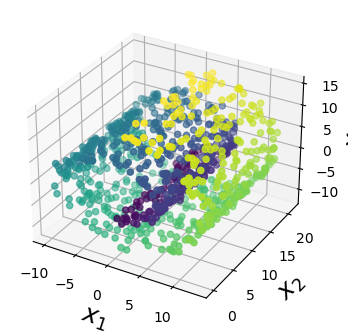

In [3]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=t)
ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.set_zlabel('$x_3$', fontsize=18)
plt.show()

In [4]:
#kernelPCA

In [5]:
from sklearn.decomposition import KernelPCA
polyPca = KernelPCA(n_components=2, kernel='poly', gamma=0.01, coef0=1, fit_inverse_transform=True)
zPoly = polyPca.fit_transform(x)

In [6]:
#Reduction

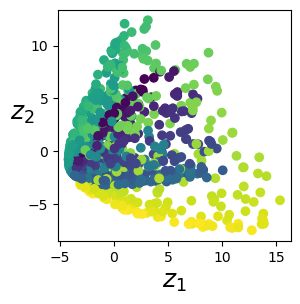

In [7]:
plt.figure(figsize=(3, 3))
plt.scatter(zPoly[:,0], zPoly[:,1], c=t)
plt.xlabel('$z_1$', fontsize=18)
plt.ylabel('$z_2$', fontsize=18, rotation=0)
plt.show()

In [8]:
#Reconstruction(Pre-Image)

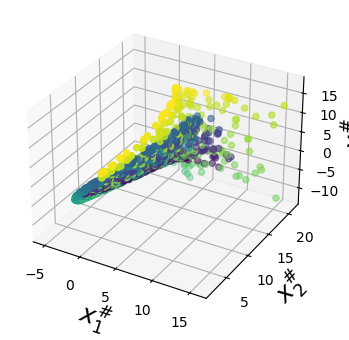

In [9]:
xpPoly = polyPca.inverse_transform(zPoly)

plt.figure(figsize=(4,4))
ax = plt.subplot(111, projection='3d')
ax.scatter(xpPoly[:, 0], xpPoly[:, 1], xpPoly[:, 2], c=t)
ax.set_xlabel('$x_1^\#$', fontsize=18)
ax.set_ylabel('$x_2^\#$', fontsize=18)
ax.set_zlabel('$x_3^\#$', fontsize=18)
plt.show()

In [10]:
#Selecting a Kernel & Tuning Hyperparameters

In [11]:
y = t > 7

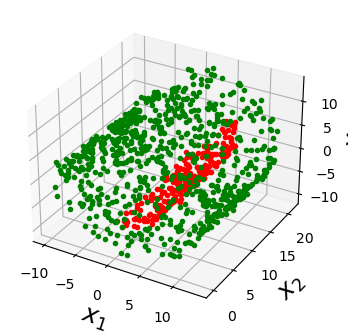

In [12]:
plt.figure(figsize=(4,4))
ax = plt.subplot(111, projection='3d')
ax.plot(x[y==0, 0], x[y==0, 1], x[y==0, 2], 'r.')
ax.plot(x[y==1, 0], x[y==1, 1], x[y==1, 2], 'g.')
ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.set_zlabel('$x_3$', fontsize=18)
plt.show()

In [13]:
#Supervised Method

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [15]:
clf = Pipeline([
    ('kpca', KernelPCA(n_components=2, fit_inverse_transform=True)),
    ('logReg', LogisticRegression())
])

paramGrid = [{
    'kpca__gamma': np.linspace(0.01, 0.06, 11),
    'kpca__kernel': ['poly', 'rbf', 'sigmoid']
}]

In [16]:
#GrindSearchCV()

In [17]:
gridSearch = GridSearchCV(clf, paramGrid, scoring='accuracy', cv=3)
gridSearch.fit(x, y)
gridSearch.best_params_

{'kpca__gamma': 0.045, 'kpca__kernel': 'rbf'}

In [18]:
gridSearch.best_score_

0.9029928131724537

In [19]:
bestPca = gridSearch.best_estimator_['kpca']

In [20]:
z = bestPca.fit_transform(x)
z

array([[-0.26147759,  0.04307511],
       [ 0.07137821, -0.16452925],
       [ 0.28599387, -0.22994784],
       ...,
       [ 0.03082533, -0.18064163],
       [-0.1301833 ,  0.05965961],
       [ 0.04506277, -0.05346541]])

In [21]:
#Reconsturction Pre-image error

In [22]:
#Pre-image

In [23]:
xp = bestPca.inverse_transform(z)

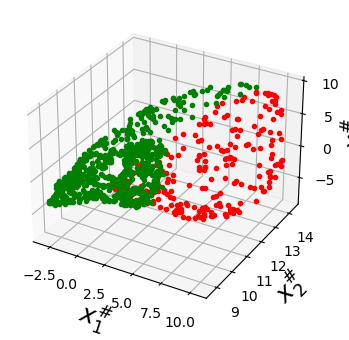

In [24]:
plt.figure(figsize=(4,4))
ax = plt.subplot(111, projection='3d')
ax.plot(xp[y==0, 0], xp[y==0, 1], xp[y==0, 2], 'r.')
ax.plot(xp[y==1, 0], xp[y==1, 1], xp[y==1, 2], 'g.')
ax.set_xlabel('$x_1^\#$', fontsize=18)
ax.set_ylabel('$x_2^\#$', fontsize=18)
ax.set_zlabel('$x_3^\#$', fontsize=18)
plt.show()

In [25]:
#Error

In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(x, xp)

29.74174919505963